# Projeto Precipitação

* Palavras chaves:
    * Precipitação
    * Evapotranspiração
    * Interpolação
    * Dados em grade


# Introdução

* Fonte dos dados:
    * Daily gridded meteorological variables in Brazil (1980–2013):
        * https://rmets.onlinelibrary.wiley.com/doi/full/10.1002/joc.4518
    * Dados Brutos:
        * https://utexas.app.box.com/v/Xavier-etal-IJOC-DATA



* Estações Meteorologicas:

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
import pandas as pd

npzfile = np.load('prec_raw.npz')
latlon = npzfile['latlon']
df_latlon = pd.DataFrame(latlon) 

mapbox_access_token = 'pk.eyJ1IjoibHVjYXN1Y2hvYSIsImEiOiJjanFxdjVjNjMwZjcwM3htdm9pbzViOW4wIn0.E8WOGX1mAGUjr0O4fbcXVA'

data = [
    go.Scattermapbox(
        lat=df_latlon[0].tolist(),
        lon=df_latlon[1].tolist(),
        mode='markers',
        marker=dict(size=9),
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=-10.116700,
            lon=-36.650002
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='1212 Multiple Mapbox')


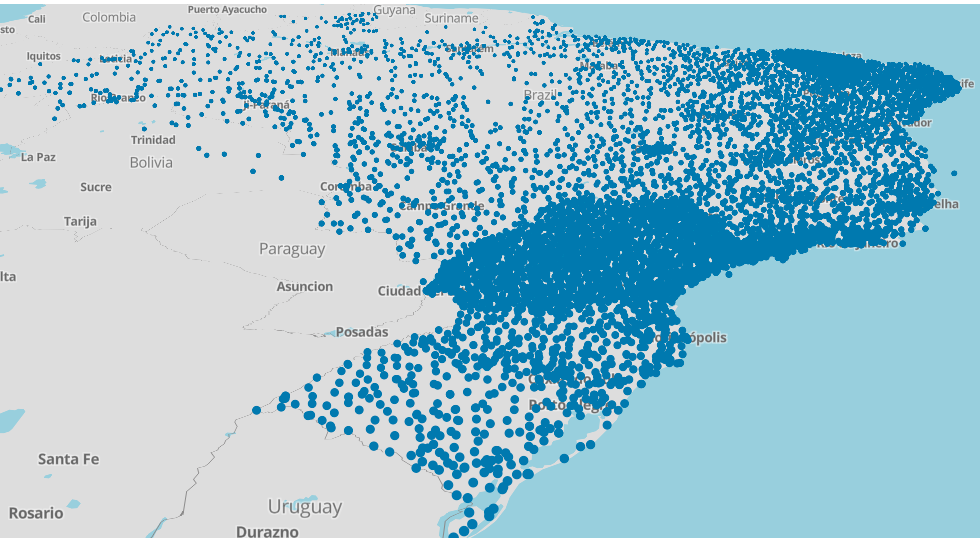

(https://plot.ly/~lucasuchoa/8/#/)

* Interpolação:
    * 6 diferentes métodos testados e comparados
    * Grade com 0.25° x 0.25°

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
import h5py
import plotly 
plotly.tools.set_credentials_file(username='mateus.normande', api_key='64glegfYYWD1va1j3Gu2')

filename = 'prec.nc'
f = h5py.File(filename, 'r')

print("Keys: %s" % f.keys())
fields = list(f.keys())
lat_key = list(fields)[0]
log_key = list(fields)[2]
count_key = list(fields)[2]

count = list(f[count_key])
lat = list(f[lat_key])
long = list(f[log_key])

grid = []
list_lat = []
list_long = []
for i in range(len(lat)):
    for j in range(len(long)):
        coord = lat[i],long[j]
        list_lat.append(lat[i])
        list_long.append(long[j])
        grid.append(coord)


mapbox_access_token = "pk.eyJ1IjoibWF0ZXVzLW5vcm1hbmRlIiwiYSI6ImNqczF6cG9oMzIwNnc0NHFyd2VqbGpheHUifQ.OZYbhTGC7-BXFMUhEQXRNg"
data = [
    go.Scattermapbox(
        lat= list_lat,
        lon = list_long,
        mode='markers',
        marker=dict(size=3)
        )]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=-9.551585,
            lon=-35.775490,
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Coordenadas')

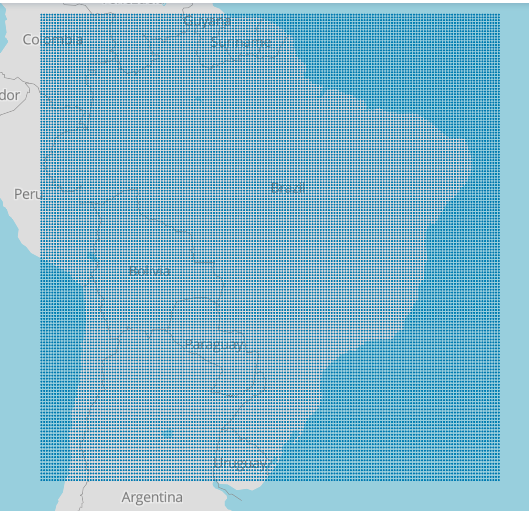

(https://plot.ly/~mateus.normande/0)


# Metodologia

* Recorte do Brasil:

In [ ]:
import pandas as pd
import h5py
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='mateus.normande', api_key='64glegfYYWD1va1j3Gu2')

filename = 'prec.nc'
f = h5py.File(filename, 'r')

# List all groups
for i in f.keys():
    print(i)

data1 = list(f.keys())[0]
data2 = list(f.keys())[2]
data3 = list(f.keys())[4]
data4 = list(f.keys())[3]

# Get the data
lat = list(f[data1])
long = list(f[data2])
count = list(f[data3])
dist_n = list(f[data4])
dia = pd.DataFrame(count[0])

grid = []
list_lat = []
list_long = []
for i in range(len(lat)):
    for j in range(len(long)):
        coord = lat[i],long[j],dia[j][i]
        list_lat.append(lat[i])
        list_long.append(long[j])
        grid.append(coord)
 
br_lat = []
br_long = []      
for k in range(len(grid)):
    if grid[k][2] != 127:
        br_lat.append(grid[k][0])
        br_long.append(grid[k][1])

mapbox_access_token = "pk.eyJ1IjoibWF0ZXVzLW5vcm1hbmRlIiwiYSI6ImNqc2tjOHZ1cTE0d3UzeW56aWZ6eG9yMXQifQ.7AYFzmLq_ycuWnF2bGhO_Q"
data = [
    go.Scattermapbox(
        lat= br_lat,
        lon = br_long,
        mode='markers',
        marker=dict(size=5)
        )]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=-9.551585,
            lon=-35.775490,
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Coordenadas_BR')

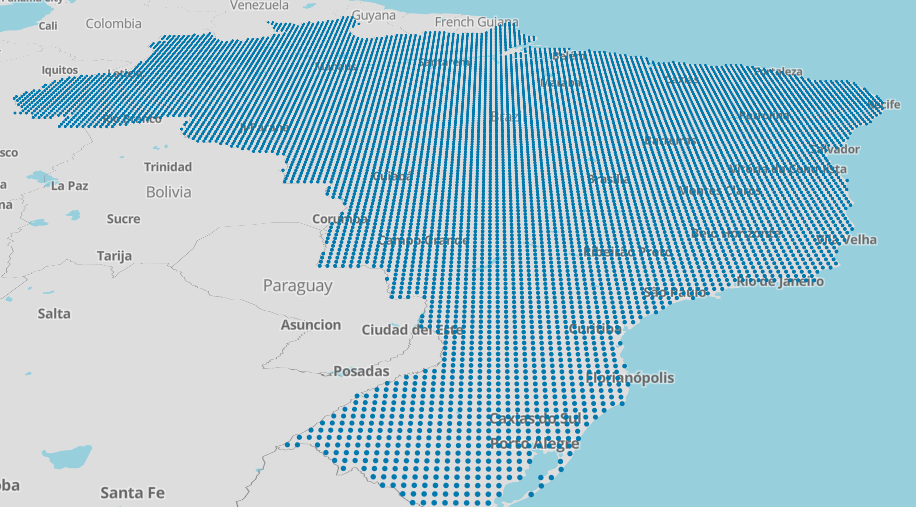

(https://plot.ly/~mateus.normande/2/#/)

* Recorte por bacia:
    * Biblioteca para utilizar o shape:
        * Geopandas
 
 
* Estrutura do dataset:
    * Biblioteca para leitura dos dataset:
        * xarray
        * netcdf4


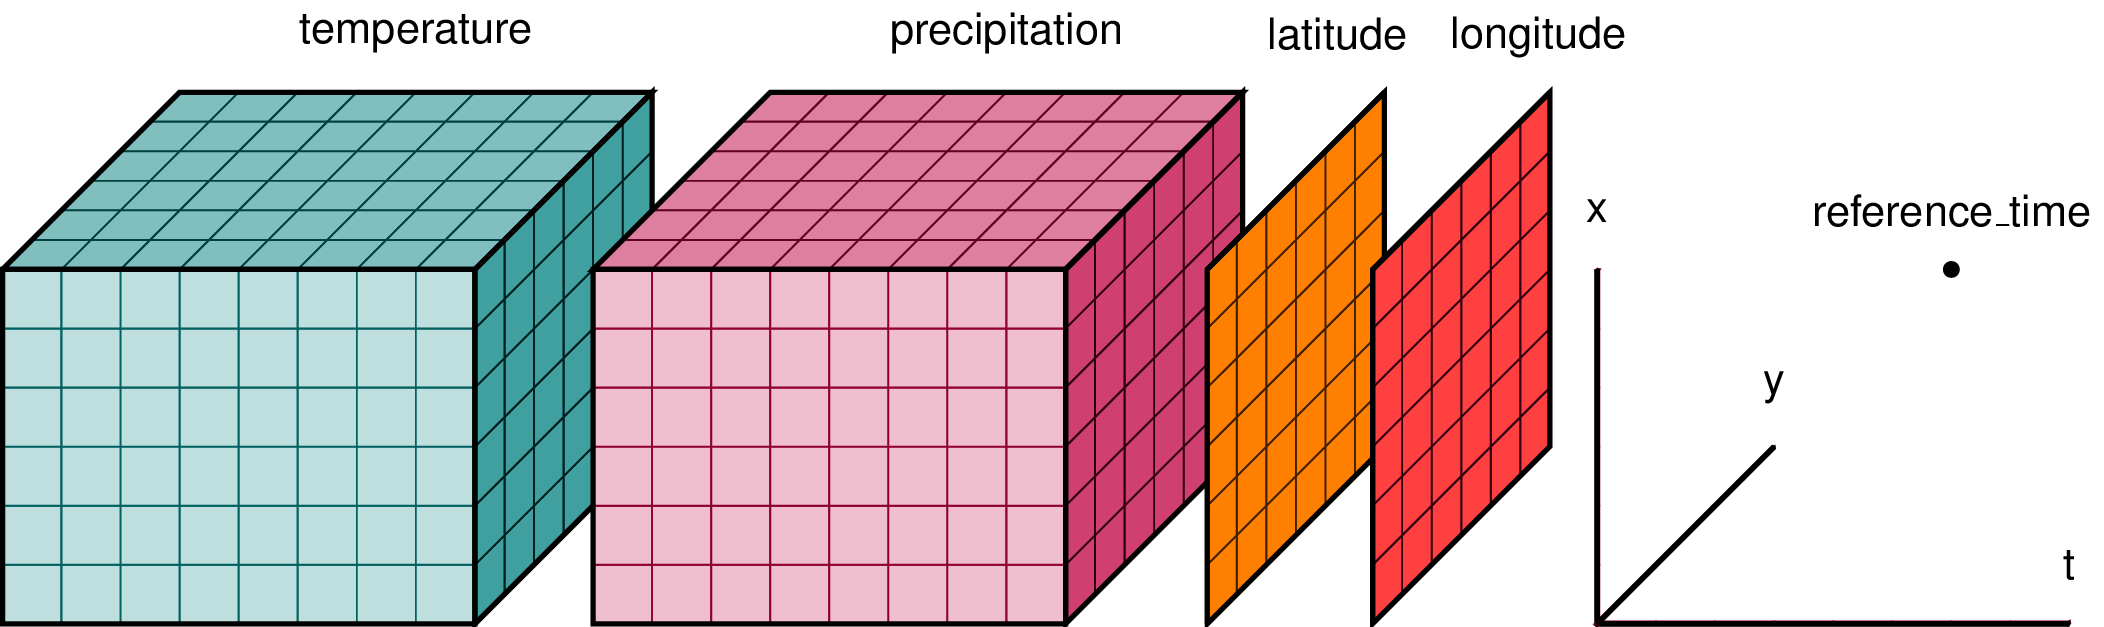

(http://xarray.pydata.org/en/stable/data-structures.html)

# Resultados

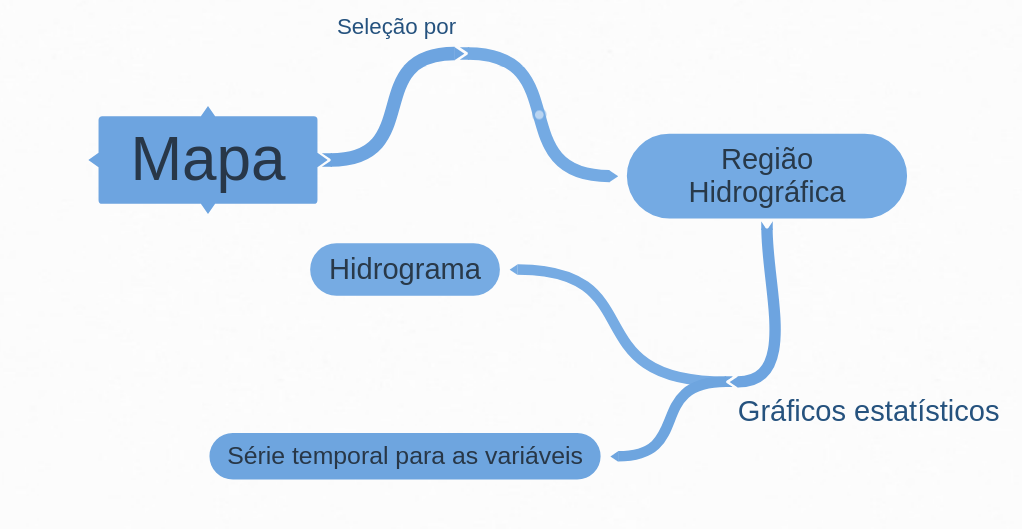